In [6]:
from datetime import datetime, timedelta

resolution = 5
now = datetime.now()
to_unixtime = now.strftime('%s')
from_unixtime = (now - timedelta(days=1)).strftime('%s')
# from_unixtime = (now - timedelta(weeks=1)).strftime('%s')
resolution, to_unixtime, from_unixtime

(5, '1521243927', '1521157527')

In [10]:
import requests
import json

url = f'https://www.bitmex.com/api/udf/history?symbol=XBTUSD&resolution={resolution}&from={from_unixtime}&to={to_unixtime}'
res = json.loads(requests.get(url).text)

In [22]:
import pandas as pd

df = pd.DataFrame(data=res).set_index('t')
df.drop(['h', 'l', 'o', 's', 'v'], inplace=True, axis=1)
df.head(3)

,c
t,
1521157500,8261.5
1521157800,8238.5
1521158100,8250.5


In [23]:
%matplotlib inline
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('__file__')) + '/../')
from sac14.btcusd import cryptowat, bitmex

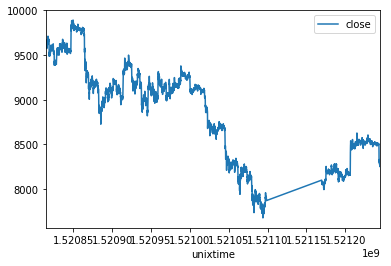

In [24]:
df_cryptowat = cryptowat()
df_cryptowat.plot()

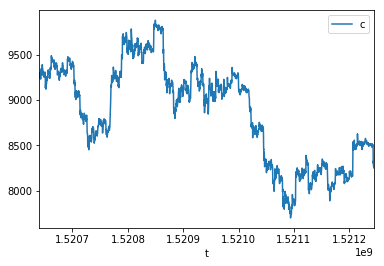

In [25]:
df_bitmex = bitmex()
df_bitmex.plot()